In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

## Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

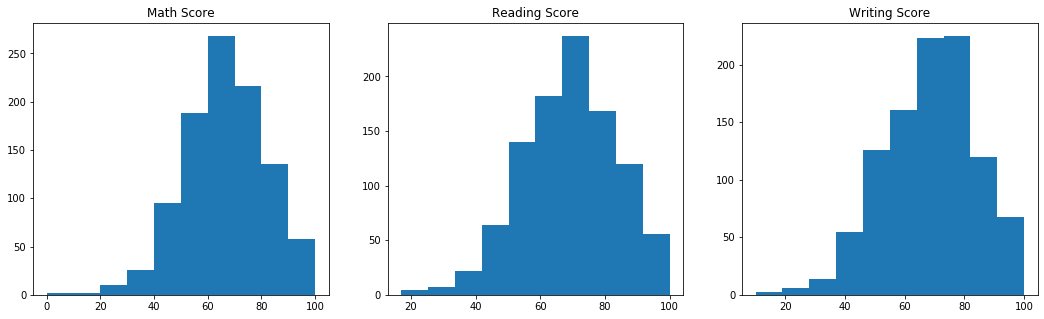

In [2]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
plt.hist(students_df["math score"])
plt.title('Math Score')

plt.subplot(1,3,2)
plt.hist(students_df["reading score"])
plt.title('Reading Score')

plt.subplot(1,3,3)
plt.hist(students_df["writing score"])
plt.title('Writing Score')

plt.show()

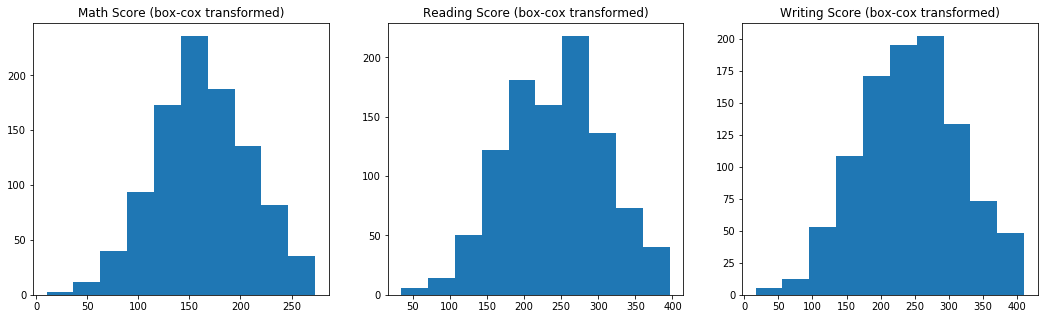

In [3]:
math_score_boxcox,_ = boxcox(students_df[students_df["math score"] > 0]["math score"])
reading_score_boxcox,_ = boxcox(students_df["reading score"])
writing_score_boxcox,_ = boxcox(students_df["writing score"])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_score_boxcox)
plt.title("Math Score (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(reading_score_boxcox)
plt.title("Reading Score (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(writing_score_boxcox)
plt.title("Writing Score (box-cox transformed)")

plt.show()

Yes, the x-axis scale is no longer out of 100. Math Score transformation doesn't change the shape too much. Reading Score transformation looks less normal. Writing Score looks a bit more normal. Will run tests to check normality.

In [4]:
jb_stats = jarque_bera(students_df["math score"])
norm_stats = normaltest(students_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(students_df["reading score"])
norm_stats = normaltest(students_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(students_df["writing score"])
norm_stats = normaltest(students_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974
Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.0435582

According to the JB test the Box-Cox transformed values are normally distributed. 

## 2. Say, we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed or not. If it's not normally distributed, apply Box-Cox transformation and check whether the transformed variable is normally distributed.

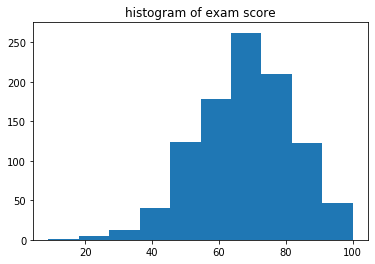

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [5]:
exam_score = (students_df["math score"] +
              students_df["reading score"] + students_df["writing score"])/3

plt.hist(exam_score)
plt.title("histogram of exam score")
plt.show()

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Not normally distributed.

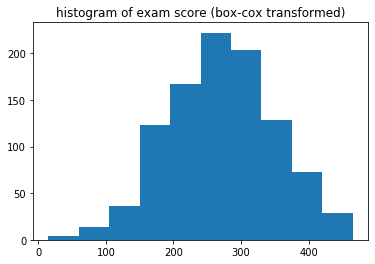

Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


In [6]:
exams_boxcox,_ = boxcox(exam_score)

plt.hist(exams_boxcox)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Exam score is now normally distributed.

## Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

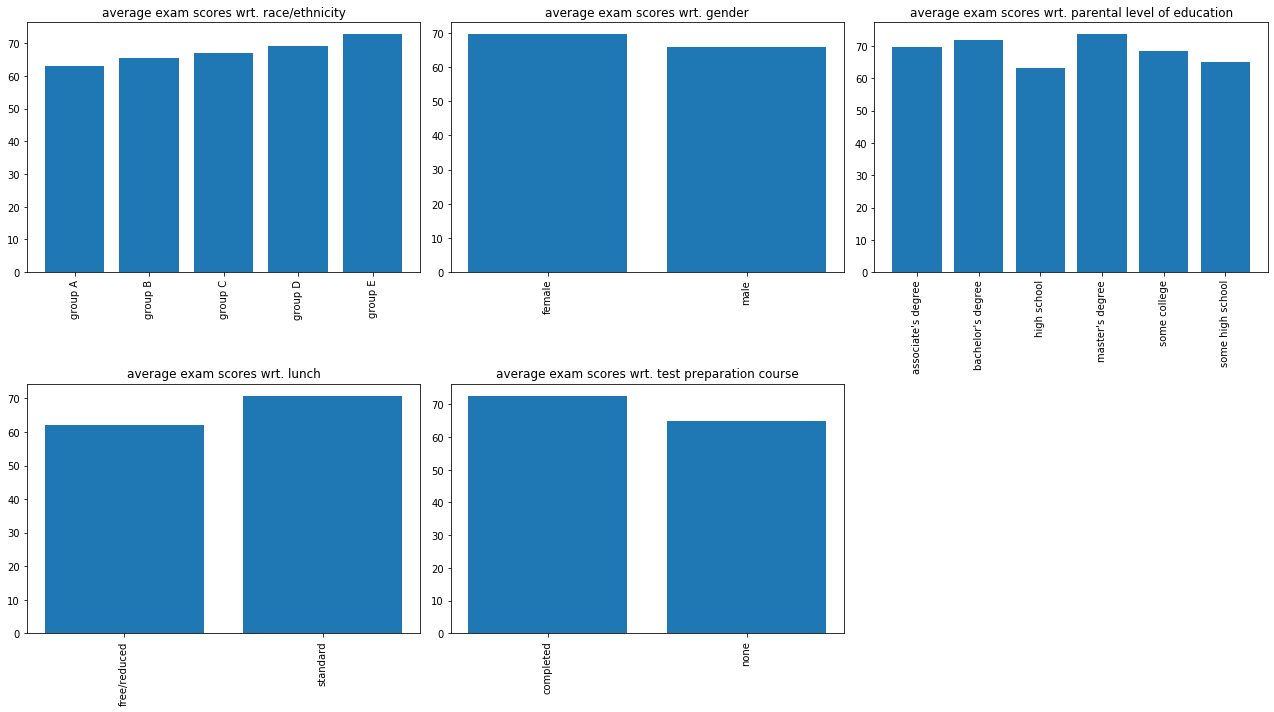

In [7]:
students_df["exam_score"] = exam_score

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(students_df.groupby("race/ethnicity")
        ["exam_score"].mean().index, students_df.groupby("race/ethnicity")["exam_score"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(students_df.groupby("gender")
        ["exam_score"].mean().index, students_df.groupby("gender")["exam_score"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(students_df.groupby("parental level of education")
        ["exam_score"].mean().index, students_df.groupby("parental level of education")["exam_score"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(students_df.groupby("lunch")
        ["exam_score"].mean().index, students_df.groupby("lunch")["exam_score"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(students_df.groupby("test preparation course")
        ["exam_score"].mean().index, students_df.groupby("test preparation course")["exam_score"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

All variables might be used in explaining the success in the exams.